In [1]:
import sqlite3
import matplotlib.pyplot as plt

def fetch_data_from_db(db_path):
    conn = sqlite3.connect(db_path)
    c = conn.cursor()

    query = '''
    SELECT typeOfProblem, algorithm, AVG(nodesGenerated) AS avg_nodes_generated
    FROM resultados
    GROUP BY typeOfProblem, algorithm
    ORDER BY typeOfProblem;
    '''
    
    c.execute(query)
    data = c.fetchall()  # Devuelve una lista de tuplas (typeOfProblem, algorithm, avg_nodes_generated)
    conn.close()
    
    return data

In [2]:
def prepare_plot_data(data):
    plot_data = {}
    problem_types = set()
    
    for row in data:
        type_of_problem, algorithm, avg_nodes_generated = row
        if algorithm not in plot_data:
            plot_data[algorithm] = {'type_of_problem': [], 'avg_nodes_generated': []}
        
        plot_data[algorithm]['type_of_problem'].append(type_of_problem)
        plot_data[algorithm]['avg_nodes_generated'].append(avg_nodes_generated)
        problem_types.add(type_of_problem)
    
    return plot_data, sorted(problem_types)

In [14]:
def plot_data(plot_data, problem_types):
    plt.figure(figsize=(10, 6))
    
    for algorithm, values in plot_data.items():
        plt.plot(values['type_of_problem'], values['avg_nodes_generated'], 
                 marker='o', linestyle='-', label=algorithm)
    
    plt.title('Number of Nodes Generated by Different Algorithms')
    plt.xlabel('Type of Problem')
    plt.ylabel('Average Nodes Generated')
    plt.grid(True)
    plt.xticks(problem_types)  # Asegura que los tipos de problema se muestren en el eje X
    plt.legend()
    
    plt.savefig('nodes_generated_comparison.pdf', bbox_inches='tight')
    plt.savefig('nodes_generated_comparison.png', bbox_inches='tight')
    plt.show()

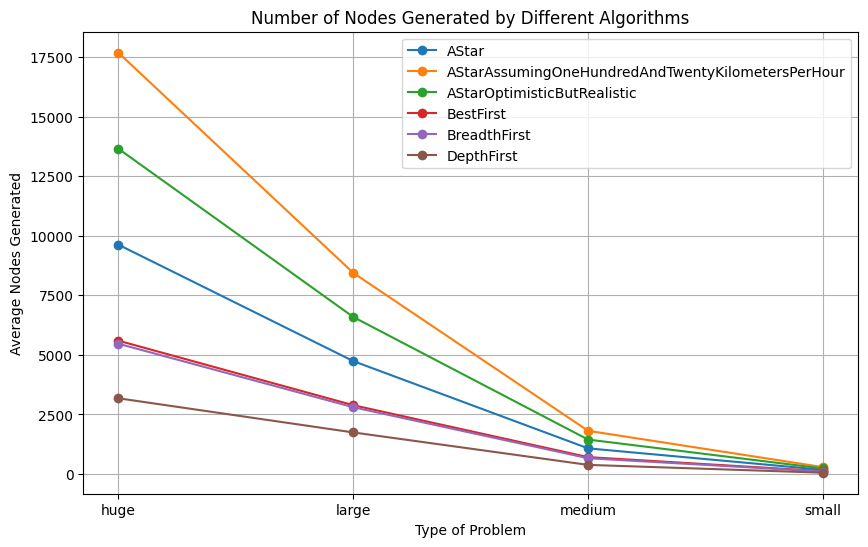

In [15]:
def main():
    db_path = 'C:\\googleMapsVS\\Google-Maps\\resultados_programa.db'  # Cambia esto a la ruta de tu base de datos
    data = fetch_data_from_db(db_path)
    
    if data:
        plot_data_prepared, problem_types = prepare_plot_data(data)
        plot_data(plot_data_prepared, problem_types)
    else:
        print("No data found in the database.")

if __name__ == '__main__':
    main()

In [9]:
plt.plot(values['type_of_problem'], values['avg_nodes_generated'], 
         marker='s', linestyle='--', color='green', label=algorithm)

NameError: name 'values' is not defined

In [5]:
__main__

NameError: name '__main__' is not defined